In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Laticce
xi, xf, N = -3, 3, 21
x = np.linspace(xi, xf, N)
y = x.copy()
X, Y = np.meshgrid(x, y)


In [12]:
def GetCharges(N=2):  # Dipolo
    Q = np.zeros(N)
    r = np.zeros((N, 2))
    Q[0] = 1
    Q[1] = -1

    r[0] = [0.05, 0.1]
    r[1] = [0.05, -0.1]

    for i in range(N):
        r[i] = [2*np.cos(i*2*np.pi/N), 2*np.sin(i*2*np.pi/N)]

    return Q, r


In [13]:
def GetEX(x, y, xi, y1, q=1):  # Electric field in x direction
    d = np.sqrt((x-xi)**2 + (y-y1)**2)
    return q*(x-xi)/d**3


def GetEY(x, y, xi, y1, q=1):  # Electric field in y direction
    d = np.sqrt((x-xi)**2 + (y-y1)**2)
    return q*(y-y1)/d**3


In [14]:
Q, rq = GetCharges(100)

In [15]:
def GetSum(x, y):
    Ex = 0
    Ey = 0

    for q in range(rq.shape[0]):
        Ex += GetEX(x, y, rq[q][0], rq[q][1], Q[q])
        Ey += GetEY(x, y, rq[q][0], rq[q][1], Q[q])
    return Ex, Ey


In [16]:
def GetField(x, y):
    Ex = np.zeros((N, N))
    Ey = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            Ex[i, j], Ey[i, j] = GetSum(x[i, j], y[i, j])
    return Ex, Ey


In [17]:
Ex, Ey = GetField(X, Y)


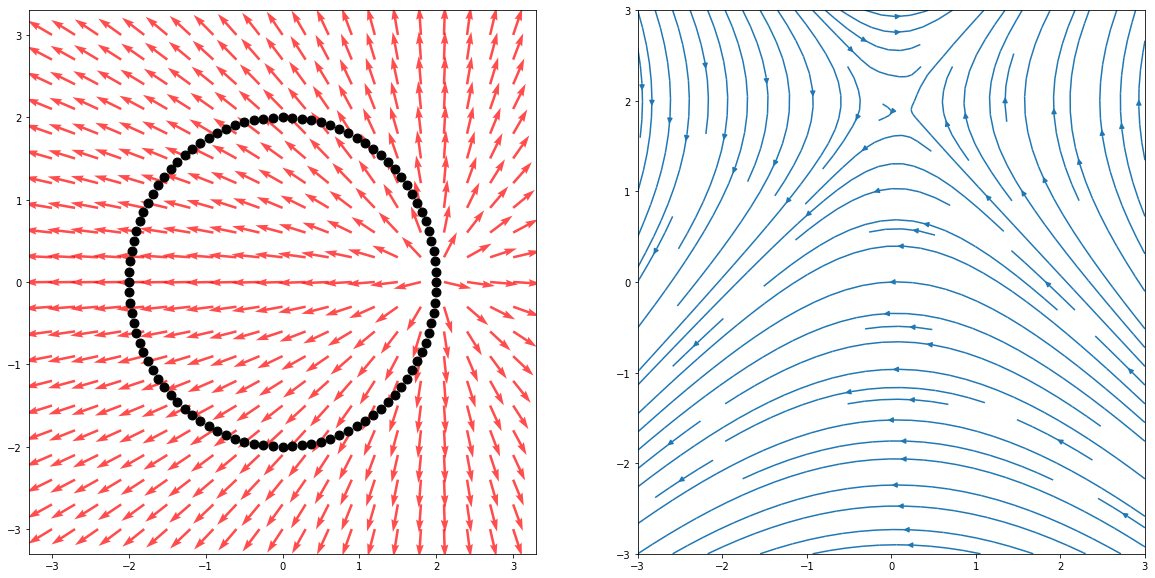

In [18]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1)
for i in range(N):
    for j in range(N):
        ax.quiver(X[i, j], Y[i, j], Ex[i, j], Ey[i, j],
                  color='r', alpha=0.7, width=0.005)

ax.scatter(rq[:, 0], rq[:, 1], s=80, color='black')

ax1 = fig.add_subplot(1, 2, 2)
ax1.streamplot(X, Y, Ex.T, Ey.T)